# Philippines' Freedom of Information website scraper

**Data from publicly available records from December 7, 2021 onwards**

Below scrapes and processes requests data from the Philippines' Freedom of Information website **(www.foi.gov.ph)**. The goal is to create a single database of these requests in a data frame and make some analysis out of them such as:

-Which agency received the most number of requests?

-How many requests had been denied/approved?

-What type of requests are most common?
Etc.

Some background: The FOI website is in compliance with Executive Order No. 2, Series of 2016 by President Rodrigo Duterte that institutionalized freedom of information in the Executive branch of government. 

This project is **ongoing.**

## Do your imports

In [2]:
import pandas as pd

import time
import requests
import re

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

from webdriver_manager.chrome import ChromeDriverManager

from bs4 import BeautifulSoup

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Open a new browser to be automatically controlled by Selenium

In [2]:
driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Could not get version for google-chrome with the any command: /Applications/Google\ Chrome.app/Contents/MacOS/Google\ Chrome --version
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Driver [/Users/prinzmagtulis/.wdm/drivers/chromedriver/mac64/97.0.4692.71/chromedriver] found in cache
/var/folders/01/dz49lpcd4qq_yksvf114xzfc0000gn/T/ipykernel_14435/1503906442.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [3]:
driver.get("https://www.foi.gov.ph/requests")

Note: That is the part of the website supposedly containing all FOI requests.

## Start locating and isolating elements

Some methods are:

By.TAG

By.CLASS_NAME

By.ID

By.XPATH

By.CSS_SELECTOR

In [4]:
tabs = driver.find_elements(By.CLASS_NAME, "col-xxs-12 col-xs-12 col-sm-8")

Used **BeautifulSoup** on this part just because I want to clearly see the elements I need to **isolate**.

In [3]:
my_url = "https://www.foi.gov.ph/requests"
foi_html = requests.get(my_url).content
#print(type(foi_html))
#print(foi_html)

#foi_list = BeautifulSoup(foi_html, "html.parser")
#print(type(foi_list))
#print(foi_list.prettify())

## Actual scraping

Now comes the main part: interacting with the pages and setting Selenium to scrape each page. We then put scraped information in a **list of dictionaries** and then into a **single data frame.** 

Kudos to my friend, Vincent, for some help in using **CSS_SELECTOR** as a locator since I'm not familiar with it.

In [6]:
dataset = []
while True:
    try:
        print('Reading a page')
        WebDriverWait(driver, 4).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, ".col-xxs-12.col-xs-12.col-sm-8"))
        )
        tabs = driver.find_elements(By.CSS_SELECTOR, ".col-xxs-12.col-xs-12.col-sm-8")
        for tab in tabs:
            try:
                all_div = tab.find_elements(By.CSS_SELECTOR, '.component-panel')
            except:
                break
            for div in all_div[1:]:
                data={}
                data ['agency'] = div.find_element(By.TAG_NAME, 'span').text
                data ['date'] = div.find_element(By.TAG_NAME, 'p').get_attribute('title')
                data ['title'] = div.find_element(By.TAG_NAME, 'h4').text
                data ['status'] = div.find_element(By.TAG_NAME, 'label').text
                data ['filer'] = div.find_elements(By.TAG_NAME, 'span')[1].text
                data ['purpose'] = div.find_elements(By.TAG_NAME, 'span')[2].text
                data ['tracking no.'] = div.find_elements(By.TAG_NAME, 'span')[4].text
                data ['link'] = div.find_element(By.TAG_NAME, 'a').get_attribute('href')
                dataset.append(data)
    except:
        break

    try:
        driver.find_element(By.XPATH, "/html/body/section/div/div/div/div[2]/div/div/div/a").click()
    except:
        print("Nothing more.")
        break

Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a 

## Generate your data frame

This is now all pandas.

So, some caveats:

First, the **ALL REQUESTS** tab apparently only contains data for about the past 40 or so days (in this case from **December 7, 2021**). Hence, we can only scrape until that level-- that represent only or **about 6%** of what the website says as **"93,373 requests"**.

Second, I tried looking into the other tabs namely **SUCCESSFUL REQUESTS**, **PROCESSING REQUESTS**, and **UNSUCCESSFUL REQUESTS**, it seems they have earlier request data but I'm assuming that they are also not complete. Second, some data in those tabs may actually be **duplicates** of those in **ALL REQUESTS** tab.

In [7]:
df = pd.DataFrame(dataset)
df

,agency,date,title,status,filer,purpose,tracking no.,link
0,PCSDS,"January 15, 2022",Water Quality of River Systems in Northern Pal...,PENDING,C. BALMONTE,Educational Purposes : Research Thesis,#DENRPCSDS-618894215639,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
1,OWWA,"January 15, 2022",DOLE AKAP,PENDING,J. Irinco,Dole akap assistance.,#OWWA-967213380605,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
2,DOH,"January 15, 2022",2nd dose vaccination certiificate,PENDING,E. SORIO,Travel abroad,#DOH-876775584029,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
3,DOH,"January 15, 2022",Vaccination Certificate (VaxCert) with QR Code,PENDING,D. Erum,Vaccination Certificate (VaxCert) with QR Code,#DOH-399155230340,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
4,DOH,"January 15, 2022",Vaxcert.,PENDING,M. Ocio,For travelling abroad,#DOH-144140714243,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
...,...,...,...,...,...,...,...,...
5679,DOH,"December 07, 2021",Vax Cert Request,SUCCESSFUL,S. Banawa,Request Vax cert with 2nd Doze,#DOH-019386211716,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
5680,NTC,"December 07, 2021",Blocked phone/stolen IMEI 860628051172135 IMEI...,PARTIALLY SUCCESSFUL,M. Ramos,For my safety and i dont want them to use,#NTC-317747857902,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
5681,BIR,"December 07, 2021",ITR,AWAITING CLARIFICATION,D. Lim,"Personal Use, Recordind",#BIR-598259168626,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
5682,OWWA,"December 07, 2021",DOLE AKAP Region 7 Fund Assistance,SUCCESSFUL,I. Reyes,Funding and Payout,#OWWA-391051097328,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...


## Cleaning the data

### Convert date to datetimes

In [8]:
df.dtypes

agency          object
date            object
title           object
status          object
filer           object
purpose         object
tracking no.    object
link            object
dtype: object

In [9]:
df.date = pd.to_datetime(df.date)
df.head(20)

,agency,date,title,status,filer,purpose,tracking no.,link
0,PCSDS,2022-01-15,Water Quality of River Systems in Northern Pal...,PENDING,C. BALMONTE,Educational Purposes : Research Thesis,#DENRPCSDS-618894215639,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
1,OWWA,2022-01-15,DOLE AKAP,PENDING,J. Irinco,Dole akap assistance.,#OWWA-967213380605,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
2,DOH,2022-01-15,2nd dose vaccination certiificate,PENDING,E. SORIO,Travel abroad,#DOH-876775584029,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
3,DOH,2022-01-15,Vaccination Certificate (VaxCert) with QR Code,PENDING,D. Erum,Vaccination Certificate (VaxCert) with QR Code,#DOH-399155230340,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
4,DOH,2022-01-15,Vaxcert.,PENDING,M. Ocio,For travelling abroad,#DOH-144140714243,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
5,DepEd,2022-01-15,High School Diploma,PENDING,D. Del Rosario,Further Studies Abroad,#DepEd-577425908869,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
6,OWWA,2022-01-15,Approval to cover returning OFW with dependent...,PENDING,C. Silvestre,For balik pinas balik pampanga program,#OWWA-906354497544,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
7,DepEd,2022-01-15,"Masterlist of Public elementary schools, enrol...",PENDING,M. Mationg,For research,#DepEd-699016748320,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
8,CIC,2022-01-15,Credit Score,PENDING,N. DICHOSO,For personal use.,#CIC-351198352637,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
9,DepEd,2022-01-15,My Learners Reference Number,PENDING,A. BORJA,For Educational Purposes,#DepEd-440546147762,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...


### Remove duplicates

Looking into the data, there were instances when individuals file similar cases with the same agency (almost always one after the other). These, we consider duplicates and can be dropped for analysis.

However, a same complaint filed with **different agencies** will NOT be considered duplicates.

In [10]:
df.duplicated().value_counts()
#There are over 1,000 duplicate entries. 

False    4557
True     1127
dtype: int64

In [11]:
df.drop_duplicates(ignore_index=True)

,agency,date,title,status,filer,purpose,tracking no.,link
0,PCSDS,2022-01-15,Water Quality of River Systems in Northern Pal...,PENDING,C. BALMONTE,Educational Purposes : Research Thesis,#DENRPCSDS-618894215639,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
1,OWWA,2022-01-15,DOLE AKAP,PENDING,J. Irinco,Dole akap assistance.,#OWWA-967213380605,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
2,DOH,2022-01-15,2nd dose vaccination certiificate,PENDING,E. SORIO,Travel abroad,#DOH-876775584029,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
3,DOH,2022-01-15,Vaccination Certificate (VaxCert) with QR Code,PENDING,D. Erum,Vaccination Certificate (VaxCert) with QR Code,#DOH-399155230340,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
4,DOH,2022-01-15,Vaxcert.,PENDING,M. Ocio,For travelling abroad,#DOH-144140714243,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
...,...,...,...,...,...,...,...,...
4552,DOH,2021-12-07,Vax Cert Request,SUCCESSFUL,S. Banawa,Request Vax cert with 2nd Doze,#DOH-019386211716,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
4553,NTC,2021-12-07,Blocked phone/stolen IMEI 860628051172135 IMEI...,PARTIALLY SUCCESSFUL,M. Ramos,For my safety and i dont want them to use,#NTC-317747857902,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
4554,BIR,2021-12-07,ITR,AWAITING CLARIFICATION,D. Lim,"Personal Use, Recordind",#BIR-598259168626,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
4555,OWWA,2021-12-07,DOLE AKAP Region 7 Fund Assistance,SUCCESSFUL,I. Reyes,Funding and Payout,#OWWA-391051097328,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...


### Look for null entries

In [12]:
df.isna().value_counts()
#No null entries detected.

agency  date   title  status  filer  purpose  tracking no.  link 
False   False  False  False   False  False    False         False    5684
dtype: int64

## Initial analysis

## How many FOI requests had been granted, denied?

Note though that this does not consider the number of days by which agencies should respond to a request. That information we will soon get by scraping the contents of the links to each requests provided under the 'link' column in the df.

In [13]:
df.status.value_counts(normalize=True)*100

SUCCESSFUL                38.898663
DENIED                    15.957072
PENDING                   15.306122
REFERRED                   8.743842
PARTIALLY SUCCESSFUL       8.198452
AWAITING CLARIFICATION     5.717804
ACCEPTED                   5.647431
PROCESSING                 1.301900
EXTENDED                   0.228712
Name: status, dtype: float64

Interpretation: Around 39% of FOI requests from December 7 to present had been granted, while 8% were deemed "partially granted." Nearly 16% were denied.

Around 7% were "accepted" or "processing", indicating that the request was received by the agency and in the process of collating info to satisfy request.

<AxesSubplot:>

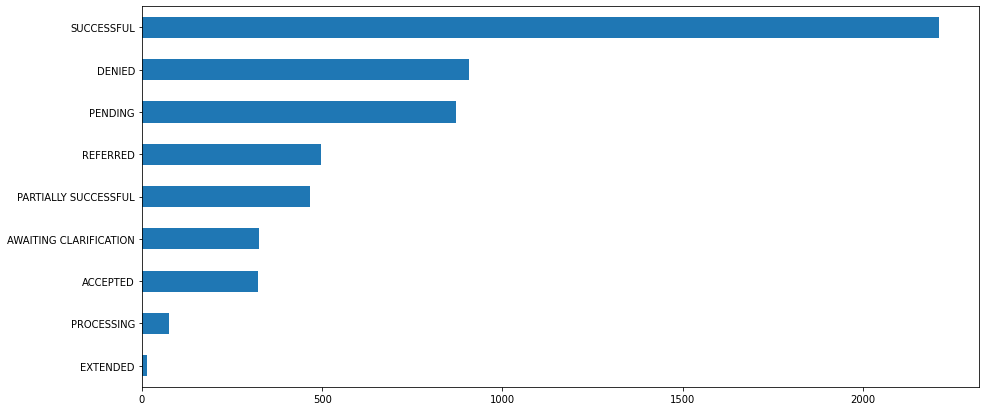

In [14]:
df.status.value_counts().sort_values().plot(kind='barh', figsize=(15,7))

## What kind of requests were denied?

In [15]:
df[df.status=="DENIED"]
#The reason for denial is found in a communication located through each link of the request.

,agency,date,title,status,filer,purpose,tracking no.,link
30,MWSSCO,2022-01-14,LWUA Standard Specifications For Water System ...,DENIED,J. Orpilla,Reference and basis in work.,#MWSSCO-145651344763,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
49,POEA,2022-01-14,The stock estimate of Filipino Migrant Workers,DENIED,J. Eusebio,Research and development,#POEA-332095230858,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
118,BIR,2022-01-14,TIN number,DENIED,J. Guitche,For employment,#BIR-438761919020,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
131,NAMRIA,2022-01-14,Basin or River Map of the Philippines,DENIED,B. Godinez,Research,#DENRNAMRIA-654609951554,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
133,NAMRIA,2022-01-14,"DEM, Municipal and Administrative Boundaries o...",DENIED,B. Godinez,Research,#DENRNAMRIA-873085890221,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
...,...,...,...,...,...,...,...,...
5665,DOH,2021-12-07,Data of People who do not want to get vaccinat...,DENIED,N. Lumbes,RESEARCH,#DOH-356820290350,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
5667,NAMRIA,2021-12-07,"Information for Coordinates BLLM 235, Cad-275 ...",DENIED,B. DELIGERO,For Lot study and plotting purposes,#DENRNAMRIA-995595697707,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
5671,CVSU,2021-12-07,Monthly Domestic Electric Consumption in regio 4a,DENIED,J. Bilanegue,Research,#CVSU-078138847878,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
5675,DOE,2021-12-07,Average monthly household electrical consumpti...,DENIED,l. reveral,Research,#DOE-497968472091,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...


## What kind of requests were approved?

In [16]:
df[df.status=="SUCCESSFUL"]

,agency,date,title,status,filer,purpose,tracking no.,link
78,USEP,2022-01-14,INC Form,SUCCESSFUL,R. Ybañez,Completion of Grade,#USEP-166195568658,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
103,BLGF,2022-01-14,Koronadal City Revenue Code,SUCCESSFUL,C. Allona,For reference. Local Business Tax.,#BLGF-459785408578,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
121,DepEd,2022-01-14,NCAE RESULT,SUCCESSFUL,M. Rojas,Requirements for Scholarship,#DepEd-658510673802,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
129,NBI,2022-01-14,The Jomo app scam,SUCCESSFUL,D. Bonbonga,To report a scammed and help me.,#NBI-983068425954,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
135,BSWM,2022-01-14,Land Cover and Land Use map of the Philippines,SUCCESSFUL,B. Godinez,Research,#BSWM-051262932417,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
...,...,...,...,...,...,...,...,...
5673,DOH,2021-12-07,Follow up on Vax Certificate,SUCCESSFUL,W. Perida,Vax Certificate,#DOH-384867551557,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
5678,DepEd,2021-12-07,Plantilla Allocation List for Reclassification...,SUCCESSFUL,J. VILLEGAS,For Inquiry,#DepEd-946775889346,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
5679,DOH,2021-12-07,Vax Cert Request,SUCCESSFUL,S. Banawa,Request Vax cert with 2nd Doze,#DOH-019386211716,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
5682,OWWA,2021-12-07,DOLE AKAP Region 7 Fund Assistance,SUCCESSFUL,I. Reyes,Funding and Payout,#OWWA-391051097328,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...


## What kind of requests were commonly filed?

In [17]:
df.title.value_counts()

Vaccination Certificate                                        131
Income Tax Return                                               64
Vaxcert                                                         48
Vaccine Certificate                                             43
VaxCert                                                         28
                                                              ... 
Savings Acct Enrollment to DAEM                                  1
OFW Deployment per Country                                       1
Limited Power Supply in El Nido Palawan                          1
manpower recruitment agency                                      1
Requested from DOLE by J.Bondame at 13:03 pm on Dec 06,2021      1
Name: title, Length: 3376, dtype: int64

## Which agencies received the most FOI requests?

In [18]:
df.agency.value_counts().head(10)

DOH      978
NTC      313
BIR      308
DepEd    219
PSA      208
NBI      186
DOLE     169
DICT     156
OWWA     154
SSS      153
Name: agency, dtype: int64

Interpretation: The Department of Health, which is leading the fight against the pandemic, has received the most number of FOI requests since December 7, 2021.

As can be gleaned from records above, some of these requests pertained to "vaccine certificates" which mostly pertain to people looking for their electronic Covid-19 vaccine certificates, and not request for public records as what the FOI is originally intended for.

## Track the number of FOI requests

Note: This does not count duplicated filings as we already cleaned them out beforehand.

### Daily

In [19]:
#Arranged from highest to lowest number of FOI filings. Top 10 shown.
df.resample('D', on='date').title.size().sort_values(ascending=False).head(10)

date
2021-12-10    331
2021-12-09    288
2021-12-13    270
2021-12-14    259
2022-01-12    238
2022-01-10    228
2022-01-11    223
2022-01-13    219
2022-01-14    212
2022-01-03    200
Name: title, dtype: int64

<AxesSubplot:xlabel='date'>

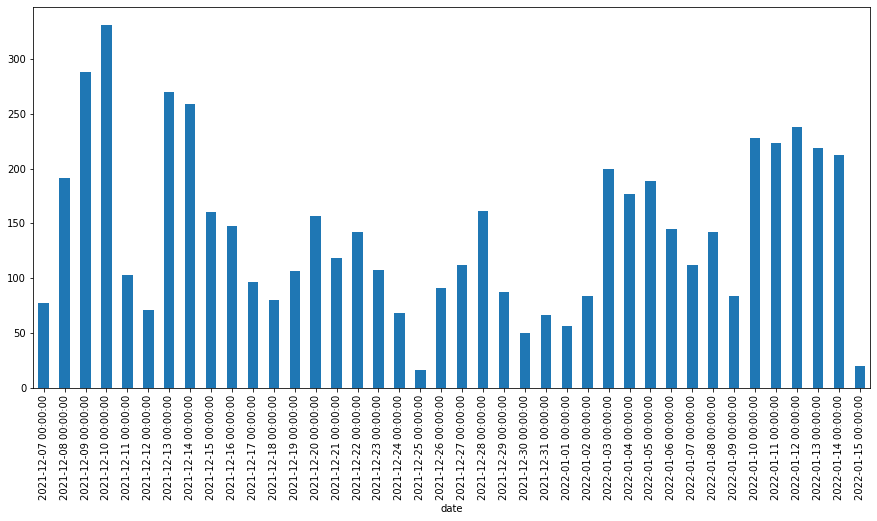

In [20]:
#Arranged by date
df.resample('D', on='date').title.size().plot(kind='bar', figsize = (15, 7))

### Monthly

In [21]:
df.resample('M', on='date').title.size()

date
2021-12-31    3355
2022-01-31    2329
Freq: M, Name: title, dtype: int64

## By agency

In [33]:
df[df.agency=="OVP"]

,agency,date,title,status,filer,purpose,tracking no.,link
21,OVP,2022-01-14,Financial assistance,PENDING,A. Gutierrez,Financial bill sa ospital,#OVP-272722751752,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
213,OVP,2022-01-14,finacial assistance,PENDING,M. Luma-ad,financial assistance,#OVP-872583766935,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
640,OVP,2022-01-12,Requesting for Financial/ Medical Assistance f...,PENDING,E. Silvestre,Requesting for Financial/ Medical Assistance f...,#OVP-275608967431,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
689,OVP,2022-01-12,Requesting for Financial/ Medical Assistance f...,PENDING,E. Silvestre,Requesting for Financial/ Medical Assistance f...,#OVP-275608967431,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
781,OVP,2022-01-11,Medical Assistance for my Premature Baby confi...,PENDING,P. Lacanaria,For medical assistance to help pay off our ris...,#OVP-972758278798,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
...,...,...,...,...,...,...,...,...
5537,OVP,2021-12-08,Medical Assistance for Heart Surgery,DENIED,J. DEL VALLE,Para madugtungan pa ang buhay ko.,#OVP-466722804642,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
5567,OVP,2021-12-08,MEDICAL ASSISTANCE FOR LIVER CANCER PATIENT,DENIED,L. Motol,for the advised procedure to be done to remove...,#OVP-703888519827,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
5586,OVP,2021-12-08,Medical Assistance for Heart Surgery,DENIED,J. DEL VALLE,Para madugtungan pa ang buhay ko.,#OVP-466722804642,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
5616,OVP,2021-12-08,MEDICAL ASSISTANCE FOR LIVER CANCER PATIENT,DENIED,L. Motol,for the advised procedure to be done to remove...,#OVP-703888519827,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...


In [48]:
df[df.agency=="OVP"].purpose.str.contains("assistance", regex=False, case=False).value_counts()

False    74
True     58
Name: purpose, dtype: int64

Interpretation: Nearly 44% of FOI filings for OVP mentions the word **"assistance."**

19% mentions **"financial assistance."**
                
15% mentions **"medical assistance."**

The Office of the Vice President is known for its poverty alleviation programs.

## Save FOI list to CSV

In [22]:
#df.to_csv("foi.csv", index=False)
#pd.read_csv("foi.csv")